###### Download das Tabelas de IRS de Portugal 
#### Fonte: https://info.portaldasfinancas.gov.pt/pt/apoio_contribuinte/tabela_ret_doclib/Pages/default.aspx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excel_file = 'Tabelas_RF_Continente_2022.xlsx'
quantity_rows = 18 # max 35
raw_tax_sheet = pd.read_excel(
    excel_file,
    #sheetname="Trabalho_Dependente",
    #index_col=0,
    skiprows = 9,
    usecols = 'B:C',
    nrows = quantity_rows
)

raw_tax_sheet.head()

,Unnamed: 1,0
0,710,0.000
1,720,0.018
2,740,0.045
3,754,0.063
4,814,0.079


In [3]:
df = raw_tax_sheet.rename( columns={'Unnamed: 1': 'gross_income', 0: 'tax_percentage'} )
print(df.head())

# Social Security tax plus IRS added
df['net_income'] = df.apply(lambda row: row[0] - (row[0] * (row[1]+0.11) ), axis=1 )

print(df.dtypes)
df

   gross_income  tax_percentage
0           710           0.000
1           720           0.018
2           740           0.045
3           754           0.063
4           814           0.079
gross_income        int64
tax_percentage    float64
net_income        float64
dtype: object


,gross_income,tax_percentage,net_income
0,710,0.000,631.900
1,720,0.018,627.840
2,740,0.045,625.300
3,754,0.063,623.558
4,814,0.079,660.154
5,922,0.101,727.458
6,1005,0.113,780.885
7,1065,0.121,818.985
8,1143,0.131,867.537
9,1225,0.141,917.525


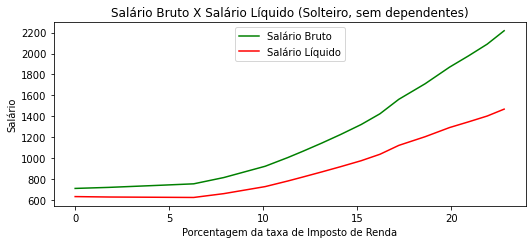

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.xlabel("Porcentagem da taxa de Imposto de Renda")
plt.ylabel("Salário")

plt.title('Salário Bruto X Salário Líquido (Solteiro, sem dependentes)')

plt.plot(df['tax_percentage'].values*100, df['gross_income'], label='Salário Bruto', color='green')
plt.plot(df['tax_percentage'].values*100, df['net_income'].values, label='Salário Líquido', color='red')

leg = plt.legend(loc='upper center')
plt.show()

In [5]:
plt.savefig('irs_file.png')

<Figure size 540x252 with 0 Axes>